In [23]:
# 1. Importação de Bibliotecas
import pandas as pd
import numpy as np

# 2. Geração de Dados Simulados para Indústria 4.0
np.random.seed(42) # Para garantir que seus dados sejam reprodutíveis

# Simulção de 1000 leituras de sensores
leituras = 1000
tempo = pd.to_datetime(pd.date_range(start='2025-01-01', periods=leituras, freq='h'))

# Simulação de Temperatura (média de 60C, desvio de 5C)
temperatura = np.random.normal(loc=60, scale=5, size=leituras)

#Simulação de Vibração (média de 0.5, desvio de 0.1)
vibracao = np.random.normal(loc=0.5, scale=0.1, size=leituras)

# 3. Introdução de Falhas (Anomalias)
# Simula um periodo de falha onde a temperatura e vibração aumentam
falha_inicio = 800
temperatura[falha_inicio:] += np.random.normal(loc=15, scale=3, size=(leituras - falha_inicio))
vibracao[falha_inicio:] += np.random.normal(loc=0.8, scale=0.2, size=(leituras - falha_inicio))

# Cria o DataFrame
df = pd.DataFrame({ 'timestamp': tempo, 'temperatura_c': temperatura, 'vibracao_g': vibracao})

# 4. Salvar os Dados ( Manter dados separados do código)
# Criar uma pasta 'data' na raiz do projeto 
df.to_csv('data/dados_sensores_simulados.csv', index=False)

# 5. Visualizar o Inicio
print(df.head())

            timestamp  temperatura_c  vibracao_g
0 2025-01-01 00:00:00      62.483571    0.639936
1 2025-01-01 01:00:00      59.308678    0.592463
2 2025-01-01 02:00:00      63.238443    0.505963
3 2025-01-01 03:00:00      67.615149    0.435306
4 2025-01-01 04:00:00      58.829233    0.569822


In [24]:
# Célula 5: Carregar os Dados e Análise Inicial

# Importar as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Carregar os dados simulados
df = pd.read_csv('data/dados_sensores_simulados.csv')

# 2. Converter 'timestamp' para o formato datetime (essencial para séries temporais)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp') # Define o tempo como índice

print("--- Informações Básicas do Dataset ---")
df.info()

print("\n--- Estatísticas Descritivas (Média, Desvio Padrão, etc.) ---")
print(df.describe())

--- Informações Básicas do Dataset ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2025-01-01 00:00:00 to 2025-02-11 15:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperatura_c  1000 non-null   float64
 1   vibracao_g     1000 non-null   float64
dtypes: float64(2)
memory usage: 23.4 KB

--- Estatísticas Descritivas (Média, Desvio Padrão, etc.) ---
       temperatura_c   vibracao_g
count    1000.000000  1000.000000
mean       63.057144     0.666813
std         7.995689     0.343962
min        43.793663     0.207865
25%        57.403083     0.462764
50%        61.496330     0.539946
75%        67.379953     0.663933
max        90.576466     1.966755


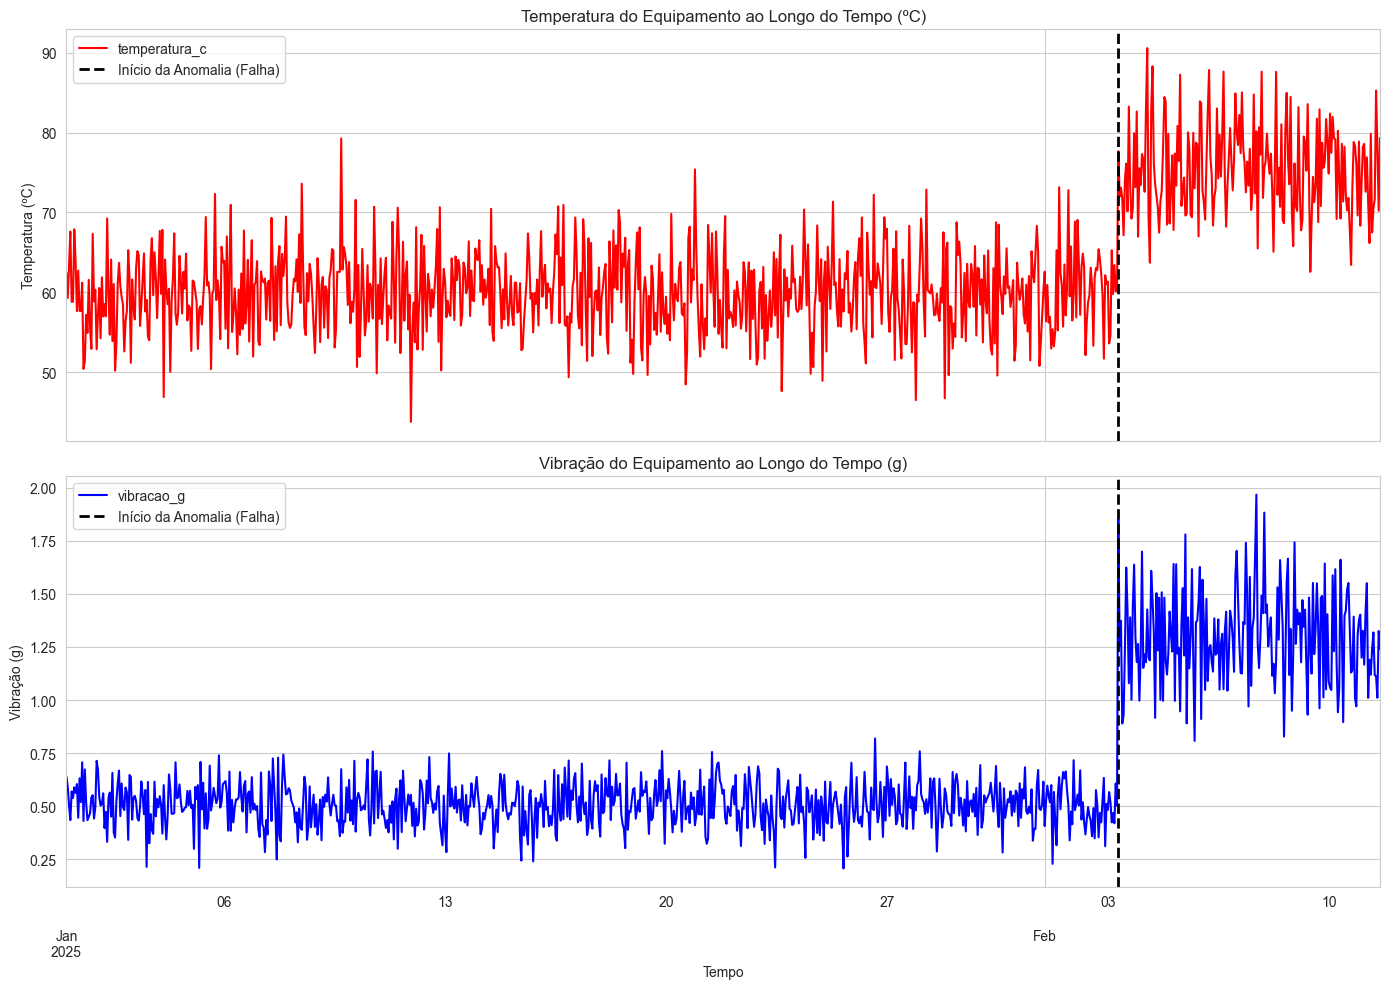

In [25]:
# Célula 6: Visualização da Série Temporal

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
falha_inicio_index = df.index[800] # O índice da linha 800 (onde a falha foi injetada)

# Gráfico da Temperatura
df['temperatura_c'].plot(ax=axes[0], title='Temperatura do Equipamento ao Longo do Tempo (ºC)', color='red')
axes[0].axvline(falha_inicio_index, color='black', linestyle='--', linewidth=2, label='Início da Anomalia (Falha)')
axes[0].set_ylabel('Temperatura (ºC)')
axes[0].legend()

# Gráfico da Vibração
df['vibracao_g'].plot(ax=axes[1], title='Vibração do Equipamento ao Longo do Tempo (g)', color='blue')
axes[1].axvline(falha_inicio_index, color='black', linestyle='--', linewidth=2, label='Início da Anomalia (Falha)')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('Vibração (g)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [26]:
## 📈 Conclusões e Insights da Análise Exploratória de Dados (EDA)

# A visualização das séries temporais de temperatura e vibração demonstra que o dataset possui uma clara separação entre o estado normal e o estado anômalo.

### 🔎 Observações Chave

# * *Comportamento Normal:* Nos primeiros 800 pontos de dados, ambas as variáveis operam em faixas estáveis (Estado de *Saúde* do equipamento).
# * *Detecção da Anomalia:* A partir do ponto de dados 800 (marcado pela linha tracejada), há uma clara *mudança de regime* e as métricas disparam.
# * *Sintomas da Pré-Falha:* O aumento na *Vibração* e *Temperatura* simula a degradação mecânica (fricção e desgaste) que precede uma falha catastrófica.

### 💡 Implicações para o Machine Learning

# O sucesso deste projeto reside na capacidade do nosso modelo de *antecipar* essa transição. O próximo passo é criar uma *Variável Alvo Binária* (is_failure_imminent) para treinar o modelo de classificação, permitindo que a manutenção seja programada *antes* da falha se concretizar.

# Próximo Passo: Preparação dos Dados para o Machine Learning (Criação da Variável Alvo).

In [27]:
# Célula 7: Criação da Variável Alvo

# Carrega os dados novamente para garantir que estamos com a versão mais recente
df = pd.read_csv('data/dados_sensores_simulados.csv')

# 1. Definir o Ponto de Falha
# Lembre-se: injetamos a falha a partir do índice 800
ponto_de_falha = 800

# 2. Criar a Variável Alvo 'Risco de Falha' (0 ou 1)
# Onde o índice é menor que 800, é 0 (Normal)
# Onde o índice é maior ou igual a 800, é 1 (Risco de Falha)
df['is_failure_imminent'] = np.where(df.index < ponto_de_falha, 0, 1)

print("Distribuição da Variável Alvo:")
print(df['is_failure_imminent'].value_counts())

# O modelo de ML precisa apenas das colunas numéricas (temperatura e vibração)
X = df[['temperatura_c', 'vibracao_g']]
y = df['is_failure_imminent']

Distribuição da Variável Alvo:
is_failure_imminent
0    800
1    200
Name: count, dtype: int64
